In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['class', 'alcohol', 'malic']
df = pd.DataFrame(df)
df

,class,alcohol,malic
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('class',axis=1),df['class'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [71]:
from sklearn.preprocessing import MinMaxScaler
### x' = (x - min(x)) / (max(x) - min(x))
scaler = MinMaxScaler() #using scikit learn minmax feature scaling
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
np.round(X_train_scaled.describe(), 1)

,alcohol,malic
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


## Effect of Scaling

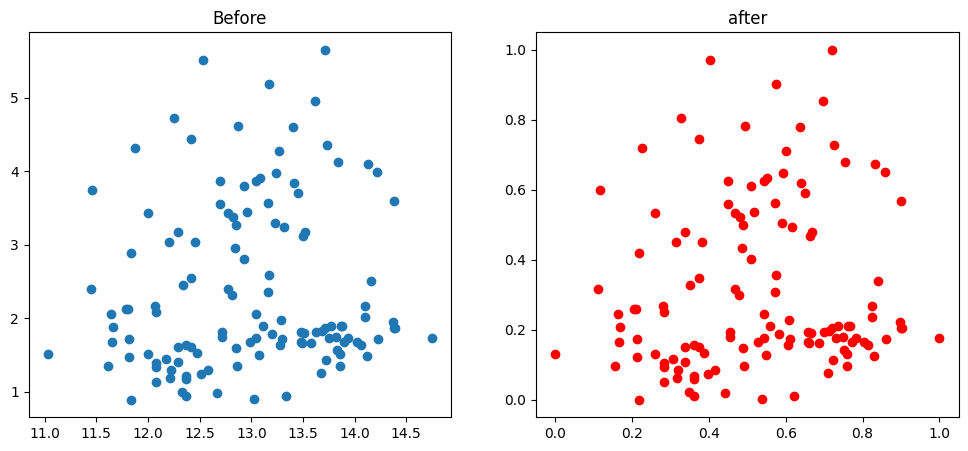

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['alcohol'], X_train['malic'])
ax1.set_title('Before')
ax2.scatter(X_train_scaled['alcohol'], X_train_scaled['malic'],color='red')
ax2.set_title('after')
plt.show()

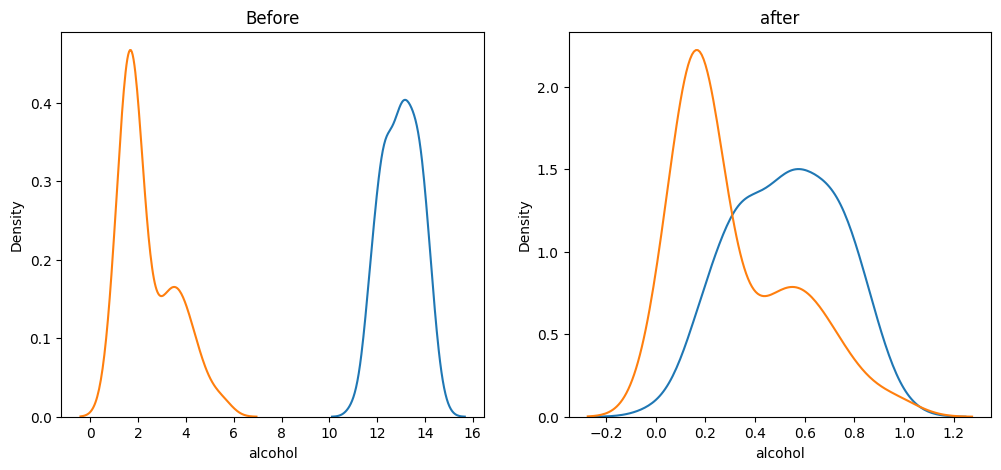

In [75]:
## with the help of we can compare the uncomparable data and scaling them makes them comparable
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Before')
sns.kdeplot(X_train['alcohol'],ax=ax1)
sns.kdeplot(X_train['malic'],ax=ax1)

ax2.set_title('after')
sns.kdeplot(X_train_scaled['alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['malic'],ax=ax2)

plt.show()